# ObsID : 0827220601, SRCNUM : 1, Instru : EMOS2

First previous observation of the source **0945070132 - 1**.

## ESASky

https://sky.esa.int/esasky/?target=53.383375%20-27.15480555555556&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas
- G : 19.7505
- BP-RP = 0.8773

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``

## Load files

In [8]:
AllData.clear()
spec = Spectrum(glob.glob("P*M2*SRSPEC0001.FTZ")[0])

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: P0827220601M2S002SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.136e-01 +/- 1.867e-03 (97.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-86
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 3.358e+04 sec
 Using fit statistic: chi
 Using Background File                P0827220601M2S002BGSPEC0001.FTZ
  Background Exposure Time: 3.358e+04 sec
 Using Response (RMF) File            m2_e13_im_pall_o.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0827220601M2S002SRCARF0001.FTZ



In [9]:
print(f"Number of counts = {1.136e-01*3.358e+04} cts")

Number of counts = 3814.688 cts


The number of counts exceeds 100 cts, indicating that the chi-squared test should be a good choice for a goodness-of-fit statistic.

## Plot spectrum

In [10]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")

      No channels ignored (no channels in specified range)
     1 channels (86) ignored in spectrum #     1



(-0.5, 860.5, 655.5, -0.5)

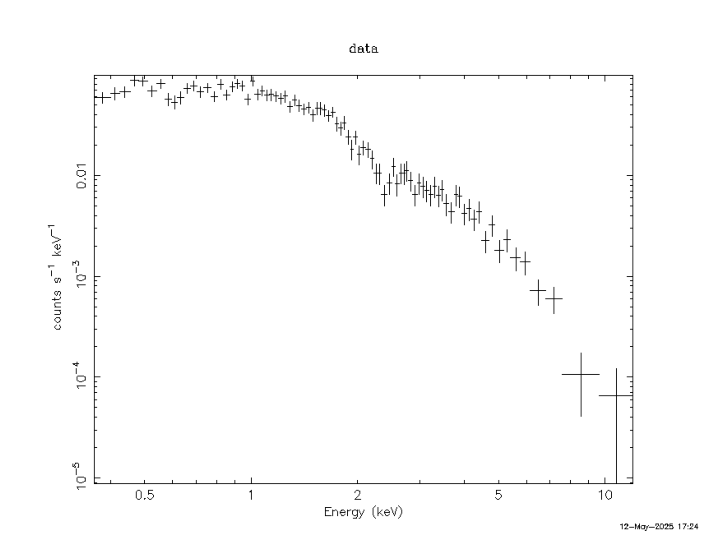

In [11]:
img = plt.imread(glob.glob('*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [12]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              8.635122e+10     using 85 bins.

Te

### Bremsstrahlung model

In [13]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.173381e+09     using 85 bins.

Test statistic : Chi-Squared              2.173381e+09     using 85 bins.
 Null hypothesis probability of 0.000000e+00 with 82 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
1217.9       119.35       -1      0.127171       7.18866   0.000457518
937.715      526101       -2     0.0454076       10.8580   0.000460595
465.672      533226       -3    0.00770334       4.07013   0.000544621


### Apec model

In [14]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.345756e+08     using 85 bins.

Test statistic : Chi-Squared              2.345756e+08     using 85 bins.
 Null hypothesis probability of 0.000000e+00 with 82 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1416.23      77.6592      -3       1.01304      0.903155   

### Powerlaw model

In [15]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.620346e+10     using 85 bins.

Test statistic : Chi-Squared              1.620346e+10     using 85 bins.
 Null hypothesis probability of 0.000000e+00 with 82 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1833.07      137.222      -1     0.0887510       1.15987   0.000178368
827.251      1.20532e+06  -2     0.0262730       1.62486   0.000329503
97.8705      854006       -3     0.0113218       2.00824   0.00058514

### Black body + Powerlaw model

In [16]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.717150e+11     using 85 bins.

Test statistic : Chi-Squared              1.717150e+11     using 85 bins.
 Null hypothesis probability of 0.000000e+00 with 80 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
2729.5       283796  

### Bremss + Powerlaw model

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.964995e+10     using 85 bins.

Test statistic : Chi-Squared              2.964995e+10     using 85 bins.
 Null hypothesis probability of 0.000000e+00 with 80 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1857.87      64702  

## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Black body + Powerlaw``: **3.9617e-12 ergs/cm^2/s**.

In [18]:
Flux_bp = 3.9617e-12 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 3.9617e-12 ergs/cm^2/s


### Optical flux

In [19]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.7505

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.3212630781247998e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [20]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw : F_x-ray/F_optical = 29.98418759739079


## Luminosity

In [21]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = {Luminosity_bp} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Bremss + Powerlaw : L_x-ray = 1.2415085984585074e+34 erg/s
